## House Price Prediction

## Author- Rohan Rathi

House price prediction using linear regression is a common and straightforward application of linear regression in the field of machine learning and data analysis. Linear regression is a supervised learning technique used to model the relationship between a dependent variable (in this case, the housing price) and one or more independent variables (commonly, features like the number of bedrooms, square footage, location, etc.).

Download the Dataset here - https://www.kaggle.com/datasets/ashydv/housing-dataset/code

# Import the Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Data

In [41]:
housing=pd.read_csv('Housing.csv')

In [42]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Exploration and Cleaning

In [5]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [9]:
housing.shape

(545, 13)

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
#Cleaning
#We will check for null values
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Here, we can see that there are no null values in the dataset

In [13]:
#We will check for NaN,none values
housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Also, there are no NaN,none values

In [14]:
#Now, We will check for duplicates
housing.duplicated().sum()

0

Also, there are no duplicate values present hence our data is clean.

## Outlier Detection And Handling

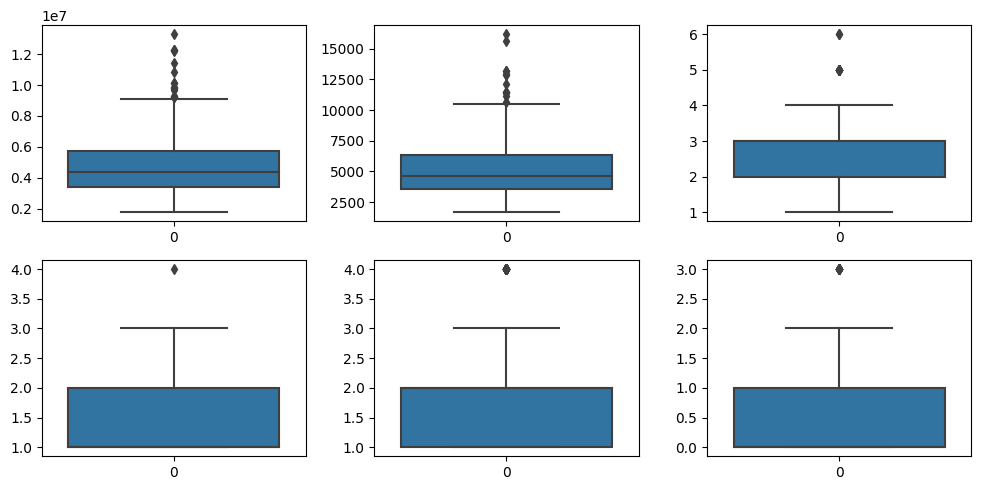

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
sns.boxplot(housing['price'], ax=axs[0, 0])
sns.boxplot(housing['area'], ax=axs[0, 1])
sns.boxplot(housing['bedrooms'], ax=axs[0, 2])
sns.boxplot(housing['bathrooms'], ax=axs[1, 0])
sns.boxplot(housing['stories'], ax=axs[1, 1])
sns.boxplot(housing['parking'], ax=axs[1, 2])

plt.tight_layout()

This code creates a grid of boxplots for the specified variables in the housing dataset. 

Outlier treatment for price

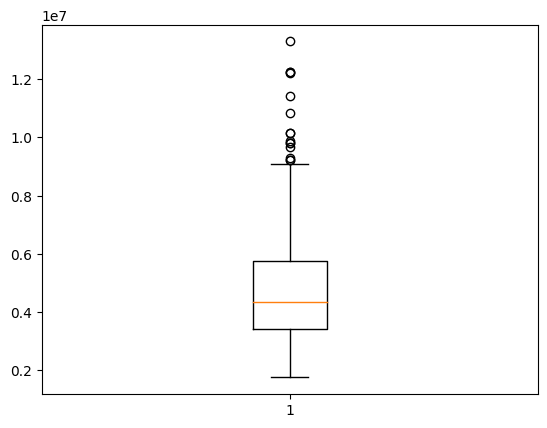

In [6]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

Outlier treatment for area

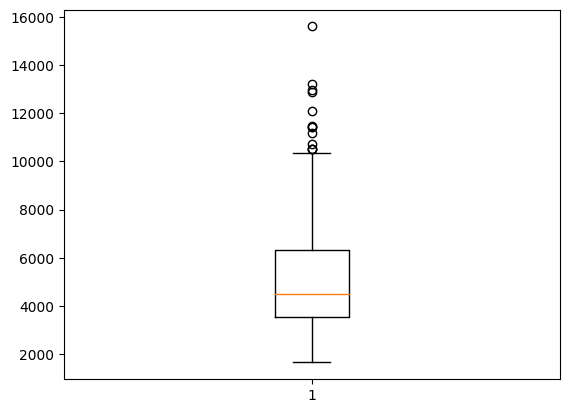

In [7]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves investigating and visualizing your data to understand its key characteristics, patterns, and relationships. EDA helps you gain insights, identify outliers, and prepare the data for subsequent analysis or modeling. 

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

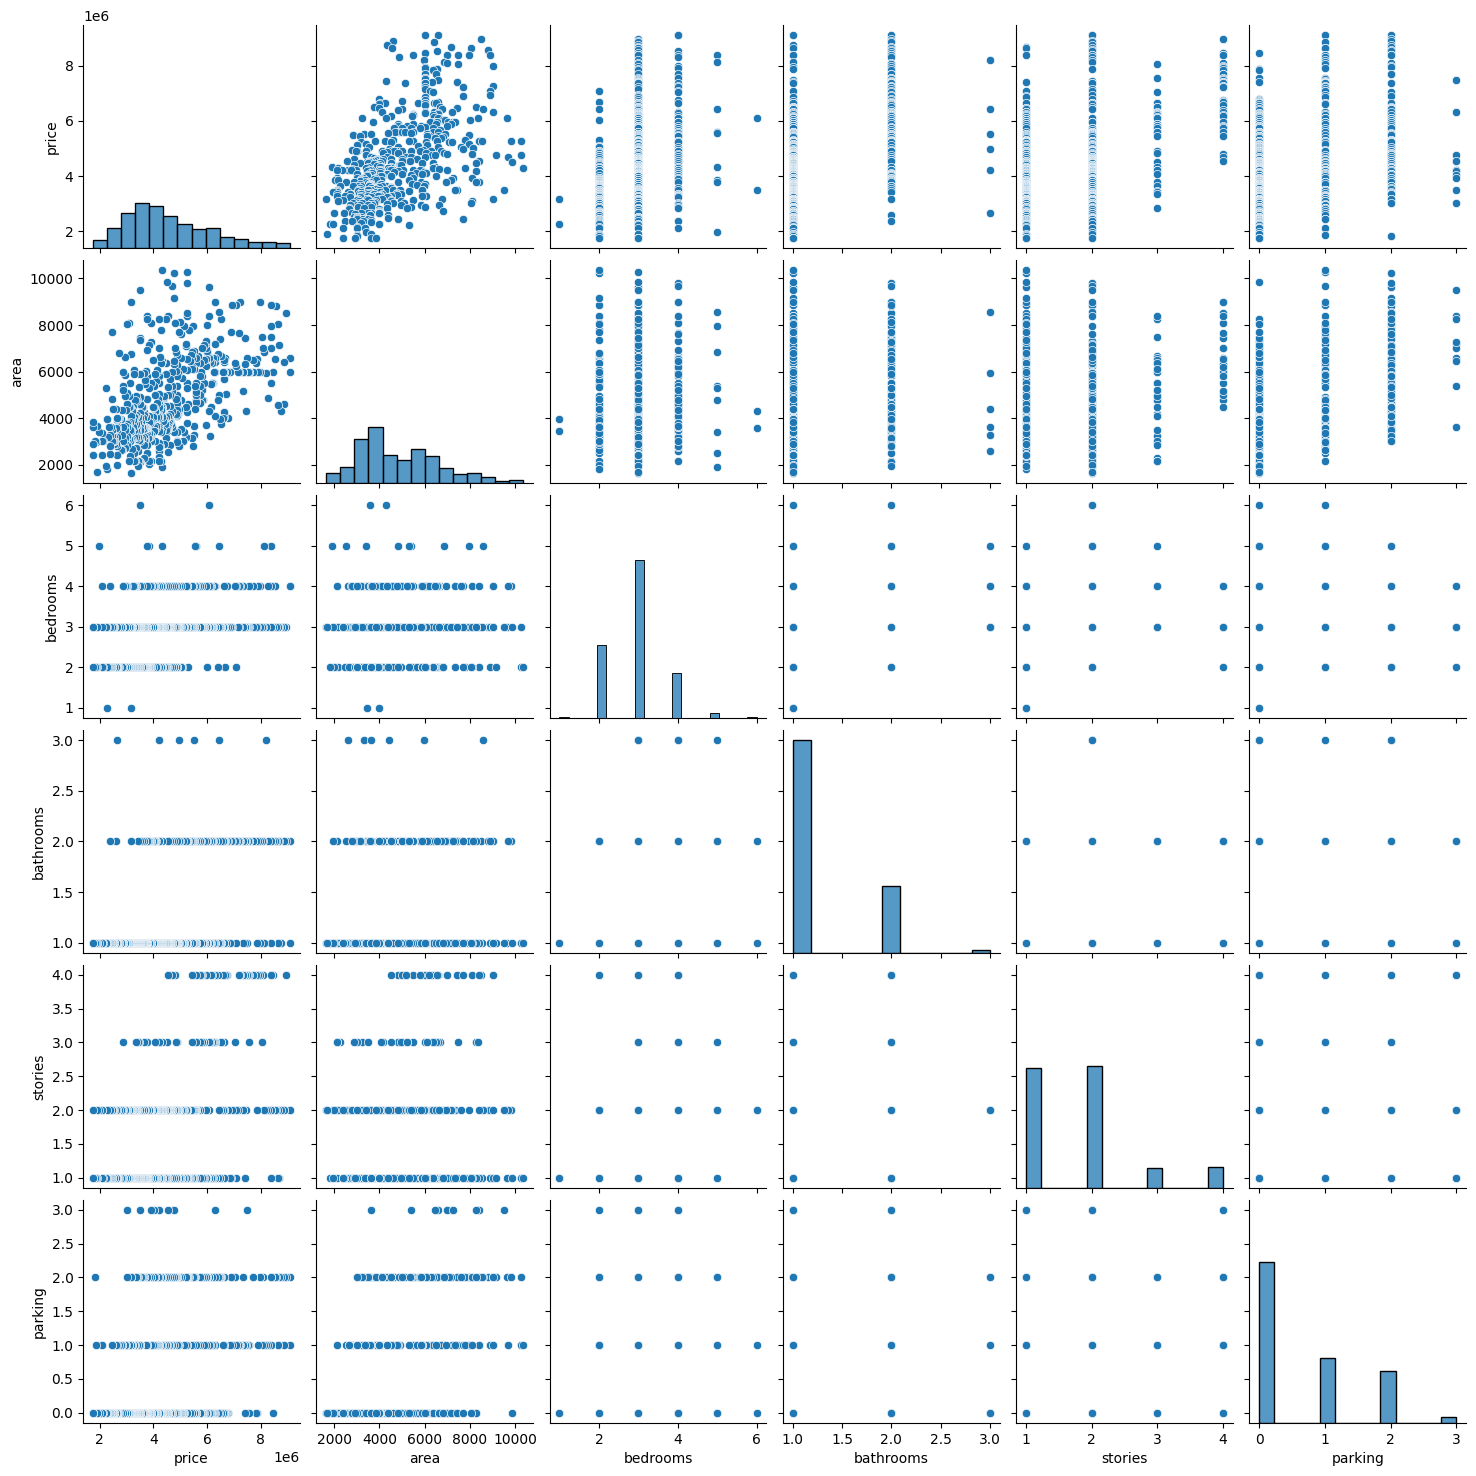

In [9]:
sns.pairplot(housing)
plt.show()

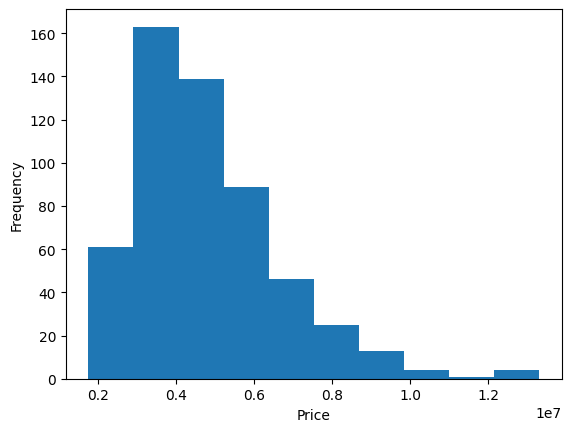

In [5]:
# Histogram of 'price'
plt.hist(housing['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


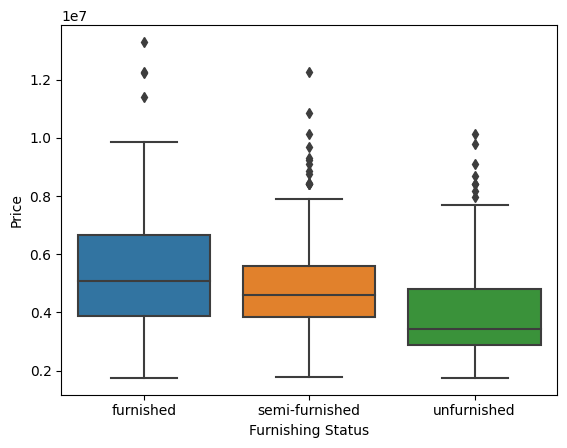

In [7]:
# Box plot of 'price' vs. 'furnishingstatus'
sns.boxplot(x='furnishingstatus', y='price', data=housing)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

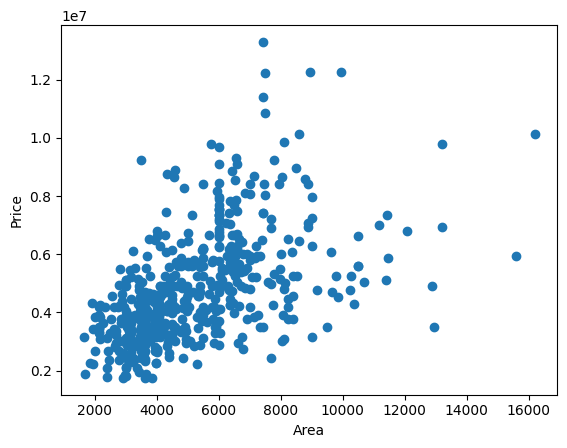

In [8]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(housing['area'], housing['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

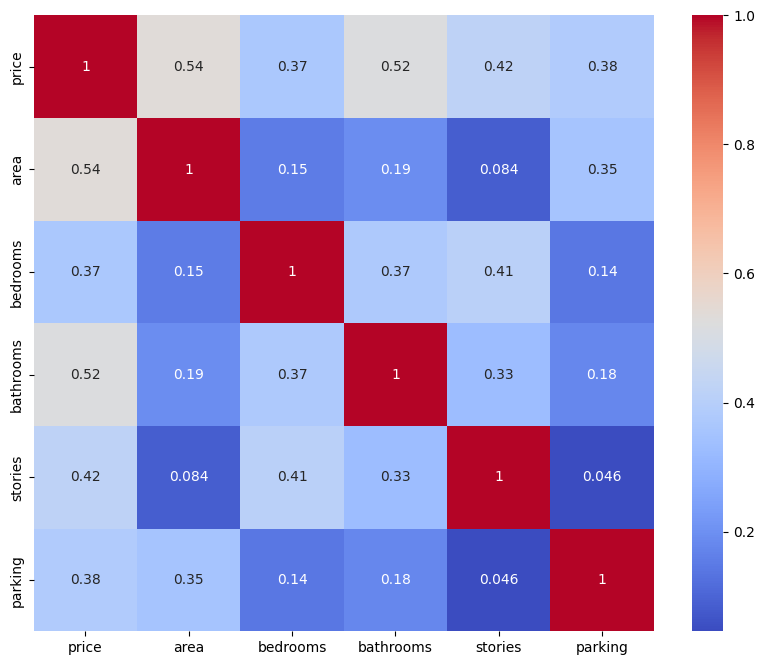

In [56]:
# Select the specific columns you want for the correlation analysis
columns_of_interest = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
subset_housing = housing[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_housing.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

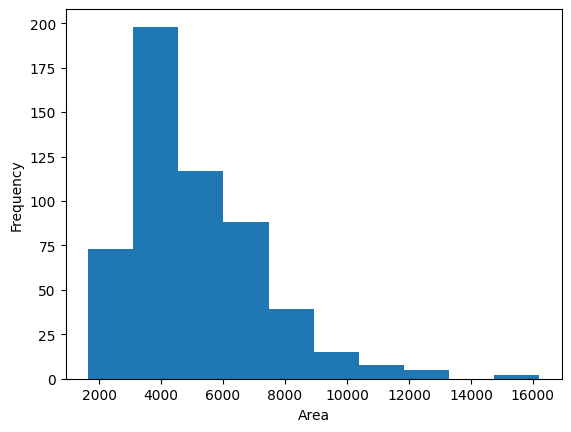

In [12]:
# Histogram of 'area'
plt.hist(housing['area'], bins=10)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

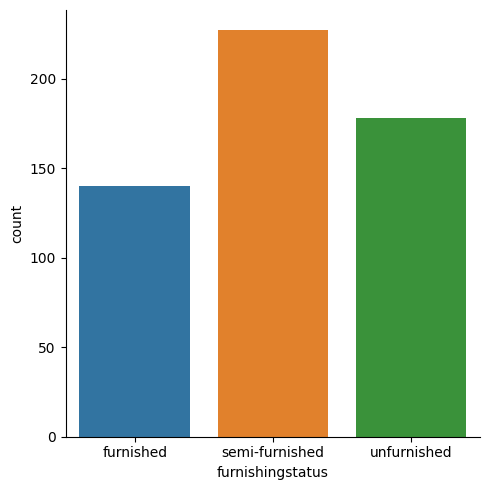

In [35]:
sns.catplot(x='furnishingstatus',kind='count',data=housing ,orient='h')

## Data Preparation

 Handling Binary Categorical Variables (Yes/No) Categories

In [47]:
# List of categorical columns containing 'yes' and 'no' values
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [48]:
housing[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [49]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [50]:
# Apply the binary_map function to multiple categorical columns in the 'data' DataFrame
housing[categorical_col] = housing[categorical_col].apply(binary_map)

# Display the updated values of the categorical columns
housing[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [51]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [52]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0,0,1


Handling Categorical data with Dummy Variable

In [ ]:
# Generate dummy variables for the 'furnishingstatus' column
dummy_col = pd.get_dummies(housing['furnishingstatus'])

# Convert the data type to integer (0 and 1)
dummy_col = dummy_col.astype(int)

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

In [44]:
# Assuming housing is your original dataset
housing = pd.concat([housing, dummy_col], axis=1)

# Remove the original 'furnishingstatus' column 
housing = housing.drop('furnishingstatus', axis=1)

Here we concat housing with dummy_col and drop furnishing status.

In [54]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


Train Machine Learning Model Using Linear Regression

In [57]:
#now lets train the model by using linear Regression 
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [59]:
# Define your feature variables (X) and target variable (y)
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  # Adjust the feature columns as needed
y = housing['price']  # Replace 'price' with your target variable

# Import the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [60]:
#lets check the shape of the data
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((436, 5), (109, 5), (436,), (109,))

In [62]:
#lets scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train[:5] , X_test[:5]

(array([[-1.17687206,  0.03201512, -0.58376171,  0.20075855, -0.78680611],
        [ 1.23991283, -1.36384432, -0.58376171, -0.93600416,  0.40020934],
        [-0.90755979, -1.36384432, -0.58376171, -0.93600416, -0.78680611],
        [ 0.7481252 ,  0.03201512, -0.58376171, -0.93600416, -0.78680611],
        [-0.57267583,  0.03201512, -0.58376171,  0.20075855, -0.78680611]]),
 array([[-0.98672347,  0.10141207, -0.52339781,  0.32899363, -0.8871656 ],
        [-0.65518355,  0.10141207, -0.52339781,  0.32899363,  1.28589171],
        [-0.58102331, -1.1268008 , -0.52339781, -0.90756863, -0.8871656 ],
        [-0.70753196, -1.1268008 , -0.52339781, -0.90756863,  0.19936306],
        [ 0.36561041,  0.10141207, -0.52339781,  1.56555589, -0.8871656 ]]))

In [63]:
#now train the model by using fit()
model.fit(X_train,y_train)

LinearRegression()

In [64]:
#now calculate the score of the model by using model.score()
model.score(X_test, y_test) , model.score(X_train, y_train)

(0.5733121079158999, 0.5573094026886813)

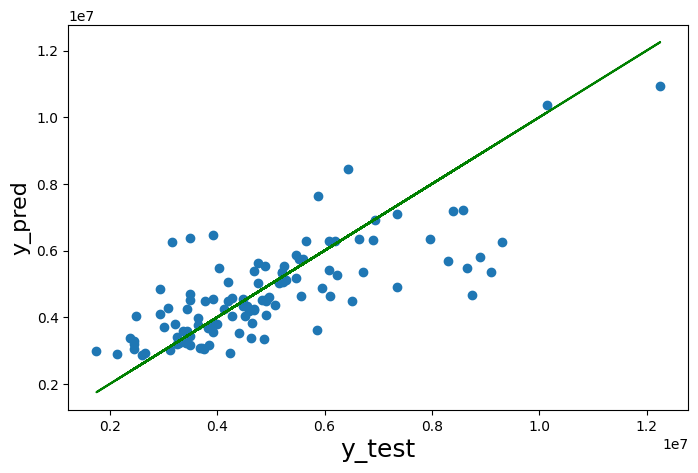

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(8,5))
y_pred= model.predict(X_test)
plt.scatter(y_test, y_pred) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="g")

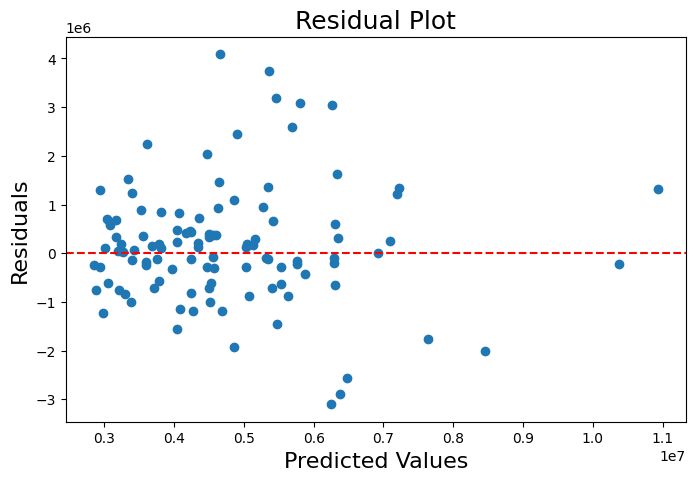

In [66]:
# Create a residual plot
residual = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residual)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Residuals', fontsize=16)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot', fontsize=18)
plt.show()

In [67]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [777681.41608195 102270.98616264 567822.34084315 446007.04313441
 300685.43419005]
Intercept: 4735169.587155963


## THANKYOU!!